# import Libraries

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, MaxPool2D, AveragePooling2D, Input, BatchNormalization, MaxPooling2D, Activation, Flatten, Dense, Dropout
from keras.models import Sequential
from keras.utils import np_utils
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from keras.preprocessing import image
import scipy
import os
import cv2

In [2]:
data = pd.read_csv("fer2013.csv")
data.shape

(35887, 3)

In [3]:
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [4]:
x_data = data['pixels']
y_data = data['emotion']

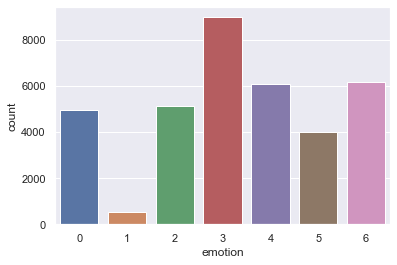

In [5]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="emotion", data=data)

In [6]:
oversampler = RandomOverSampler(sampling_strategy='auto')

x_data, y_data = oversampler.fit_resample(x_data.values.reshape(-1,1), y_data)
print(x_data.shape," ",y_data.shape)

(62923, 1)   (62923,)


In [7]:
y_data.value_counts()

0    8989
2    8989
4    8989
6    8989
3    8989
5    8989
1    8989
Name: emotion, dtype: int64

In [8]:
x_data = pd.Series(x_data.flatten())
x_data

0        70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1        151 150 147 155 148 133 111 140 170 174 182 15...
2        231 212 156 164 174 138 161 173 182 200 106 38...
3        24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4        4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
                               ...                        
62918    17 0 0 2 21 40 70 109 136 154 171 188 203 212 ...
62919    129 113 81 69 47 25 7 9 15 26 62 106 136 155 1...
62920    119 125 195 188 185 214 197 175 199 210 212 19...
62921    141 140 146 135 30 40 45 54 67 76 86 90 92 98 ...
62922    168 161 200 146 55 72 151 236 243 227 217 220 ...
Length: 62923, dtype: object

In [9]:
x_data = np.array(list(map(str.split, x_data)), np.float32)
x_data/=255

In [10]:
y_data = np.array(y_data)
y_data = y_data.reshape(y_data.shape[0], 1)
y_data.shape

(62923, 1)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.1, random_state = 45)
print(x_train.shape," ",y_train.shape)

(56630, 2304)   (56630, 1)


In [12]:
y_train = np_utils.to_categorical(y_train, 7)
y_test = np_utils.to_categorical(y_test, 7)

In [13]:
model = keras.Sequential([
    Input(x_train.shape[1]),
    Dense(2048, activation = 'relu'),
    BatchNormalization(axis = 1),
    Dense(1024, activation = 'relu'),
    BatchNormalization(axis = 1),
    Dense(512, activation = 'relu'),
    BatchNormalization(axis = 1),
    Dense(256, activation = 'relu'),
    BatchNormalization(axis = 1),
    Dense(7, activation = 'sigmoid')
])
 
model.summary()

2022-03-09 07:42:07.524559: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-09 07:42:07.643414: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-09 07:42:07.644537: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-09 07:42:07.648033: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2048)              4720640   
_________________________________________________________________
batch_normalization (BatchNo (None, 2048)              8192      
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024)              4096      
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
dense_3 (Dense)              (None, 256)               1

o
2022-03-09 07:42:07.650793: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-09 07:42:07.651774: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-09 07:42:09.902220: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-09 07:42:09.903272: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-09 07:42:09.904229: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from

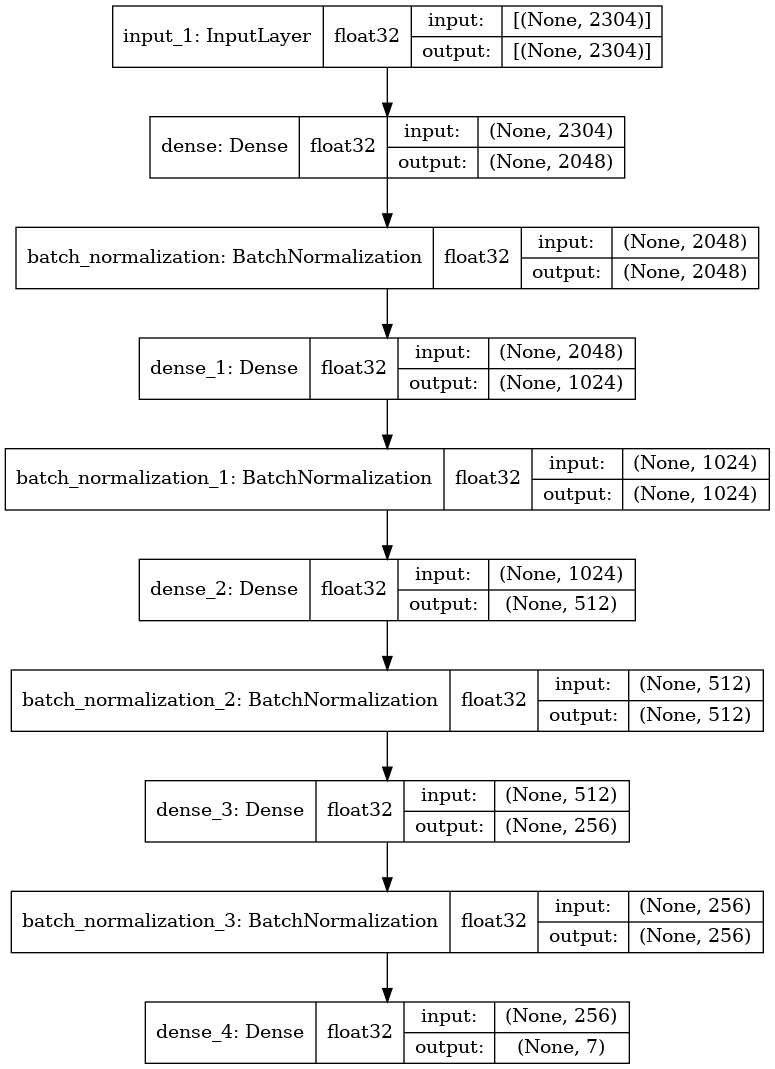

In [14]:
tf.keras.utils.plot_model(model, to_file = "model.png", show_shapes = True, show_dtype = True)

In [15]:
adam = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 50)

2022-03-09 07:42:12.383367: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
1770/1770 [==============================] - 15s 7ms/step - loss: 1.6796 - accuracy: 0.3747 - val_loss: 1.7688 - val_accuracy: 0.3504
Epoch 2/50
1770/1770 [==============================] - 12s 7ms/step - loss: 1.4500 - accuracy: 0.4505 - val_loss: 1.7934 - val_accuracy: 0.3261
Epoch 3/50
1770/1770 [==============================] - 12s 7ms/step - loss: 1.3639 - accuracy: 0.4851 - val_loss: 1.7236 - val_accuracy: 0.3556
Epoch 4/50
1770/1770 [==============================] - 13s 7ms/step - loss: 1.3049 - accuracy: 0.5059 - val_loss: 2.3011 - val_accuracy: 0.3019
Epoch 5/50
1770/1770 [==============================] - 12s 7ms/step - loss: 1.2542 - accuracy: 0.5255 - val_loss: 1.8843 - val_accuracy: 0.3466
Epoch 6/50
1770/1770 [==============================] - 13s 8ms/step - loss: 1.2046 - accuracy: 0.5440 - val_loss: 1.7032 - val_accuracy: 0.3855
Epoch 7/50
1770/1770 [==============================] - 12s 7ms/step - loss: 1.1502 - accuracy: 0.5677 - val_loss: 1.6694 - val_ac

In [17]:
print("Accuracy of our model on validation data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

197/197 [==============================] - 1s 3ms/step - loss: 1.2830 - accuracy: 0.7024
Accuracy of our model on validation data :  70.23677229881287 %


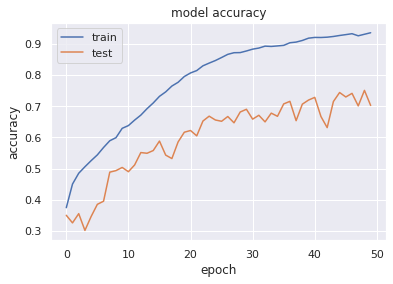

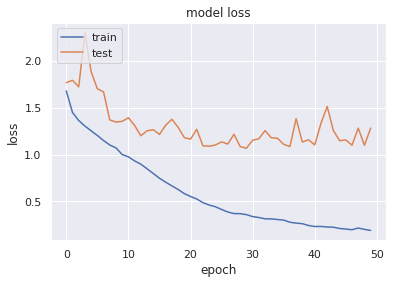

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
predictions = model.predict(x_test)
y_pred = []

for p in predictions:
    y_pred.append(np.argmax(p))
y_pred[:10]

[6, 3, 3, 6, 6, 6, 3, 4, 1, 4]

In [20]:
y_actual = []

for a in y_test:
    y_actual.append(np.argmax(a))
y_actual[:10]

[6, 5, 5, 6, 1, 0, 3, 4, 1, 3]

In [21]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_actual, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.69      0.68       935
           1       0.98      0.85      0.91       895
           2       0.67      0.67      0.67       880
           3       0.54      0.64      0.59       906
           4       0.65      0.58      0.62       888
           5       0.85      0.84      0.84       869
           6       0.63      0.64      0.64       920

    accuracy                           0.70      6293
   macro avg       0.71      0.70      0.71      6293
weighted avg       0.71      0.70      0.71      6293



Text(66.5, 0.5, 'Truth')

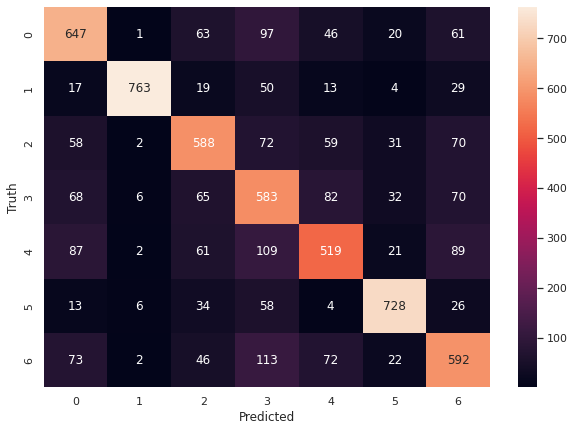

In [22]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels = y_actual, predictions = y_pred)

plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')